In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

## Import the data

In [95]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [96]:
df1.shape

(13320, 9)

# Task 1: Clean the data

### Counting how many different 'area_type' we have

In [97]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

### Dropping the unnecessary columns

In [98]:
df2 = df1.drop(columns=['area_type','availability','society','balcony'], axis='y')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [99]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

### The amount of null values is very small as compared to our total data, so we can drop this rows safety


In [100]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### We have 2 types of sizes: BHK and Bedroom. Creat a column with the int value

In [101]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [102]:
def get_bhk(size):
    bhk = int(size.split()[0])
    return bhk

df3['bhk'] = df3['size'].apply(lambda size: get_bhk(size))
df3.head()

<ipython-input-102-accd5b378882>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda size: get_bhk(size))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [103]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [104]:
df3[(df3['bhk']>20)]
# House with 43 bedroom and 2400 is incompatible

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


### Transformin almost every value in the column 'total_sqft' in sqft float (the column has values in format Min/Max, Sq. Meter, yards, etc)

In [105]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [106]:
def is_float(value):
    try:
        float(value)
    except:
        return False
    return True

df3[~df3['total_sqft'].apply(lambda value : is_float(value))]['total_sqft'].unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
       '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882',
       '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards',
       '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315',
       '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '167Sq. Meter', '1076 - 1199',

In [107]:
import re

def to_sqft_num(value):
    '''Convert most part of formats to sqft. If not convert for any reason, returns False'''
    float_val_reg = r'(\d+(\.?\d*))'
    
    # Value format is correct
    sqft_fmt = re.search(fr'^{float_val_reg}$', value)
    
    # Value format as 'xxxx - xxxx'
    min_max_reg = fr'^{float_val_reg}\s-\s{float_val_reg}$'
    min_max_fmt = re.search(min_max_reg, value)
    
    # Value format as 'xxxxSq. Meter'
    sq_meter_reg = fr'^{float_val_reg}Sq. Meters?$'
    sq_meter_fmt = re.search(sq_meter_reg, value, flags=re.I)
    
    # Value format as 'xxxxSq. Yards'
    sq_yards_reg = fr'^{float_val_reg}Sq. Yards?$'
    sq_yards_fmt = re.search(sq_yards_reg, value, flags=re.I)
    
    # Value format as 'xxxxAcres'
    acres_reg = fr'^{float_val_reg}Acres?$'
    acres_fmt = re.search(acres_reg, value, flags=re.I)    
    
    if sqft_fmt:
        try:
            return float(value)
        except:
            return None
    
    if min_max_fmt:
        value = value.split('-')
        num1 = float(value[0].strip())
        num2 = float(value[-1].strip())
        average = (num1 + num2) / 2
        try:
            return float(average)
        except:
            return None
    
    if sq_meter_fmt or sq_yards_fmt:
        value = float(value.split('S')[0])
        if sq_meter_fmt:  
            try:
                return float(value * 10.764)
            except:
                return None
        if sq_yards_fmt:
            try:
                return float(value * 9)
            except:
                return None

    if acres_fmt:
        value = float(value.split('A')[0])
        try:
            return float(value * 43560)
        except:
            return None
            
    return None

In [108]:
df4 = df3.copy()

df4['total_sqft'] = df4['total_sqft'].apply(lambda value : to_sqft_num(value))
df4[~df4['total_sqft'].apply(lambda value : is_float(value))]['total_sqft'].unique()

array([], dtype=float64)

### Create the column 'price_per_sqft'

In [109]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Put the locations with less than 10 houses in the group 'other'

In [110]:
len(df5['location'].unique())

1304

In [111]:
df5['location'].apply(lambda loc : loc.strip())
df5.groupby('location')['location'].count() > 10
location_stats = df5.groupby('location')['location'].count().sort_values(ascending=False)
location_stats

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [112]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [113]:
len(df5.location.unique())

1304

In [114]:
len(df5.location.unique())
df5['location'] = df5['location'].apply(lambda loc : "other" if loc in location_stats_less_than_10 else loc)
len(df5.location.unique())

242

# Task 2: Outlier Removal

In [115]:
df6 = df5.copy()
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## bhk outlier remove
- It's common have a bhk per, at most, 300 sqft. If the house has more than it we can remove them

In [116]:
df6[df6['total_sqft']/df6['bhk'] < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [117]:
print(df6.shape)
df6 = df6[~(df6['total_sqft']/df6['bhk'] < 300)]
print(df6.shape)

(13246, 7)
(12499, 7)


## Price per squarefoot
- We can get rid of the houses where the price is very high or very low
- To determine which price is very high or very low, we use the standard deviation (the price has to be between ' mean +- standard deviation '

In [118]:
df6['price_per_sqft'].describe()

count     12493.000000
mean       6301.052137
std        4168.531107
min           2.257423
25%        4205.607477
50%        5291.005291
75%        6916.996047
max      176470.588235
Name: price_per_sqft, dtype: float64

In [120]:
def remove_pps_outliners(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf['price_per_sqft'])
        std_dev = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] <= (mean + std_dev)) & (subdf['price_per_sqft'] >= (mean - std_dev))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

print(df6.shape)
df7 = remove_pps_outliners(df6)
df7.shape

#There was 2230 (12499 - 10269) houses with prices outliners

(12499, 7)


(10269, 7)

### Get the price for houses with the same sqft and different bhk
- 3 bkh houses are more expensive than 2 bhk houses?

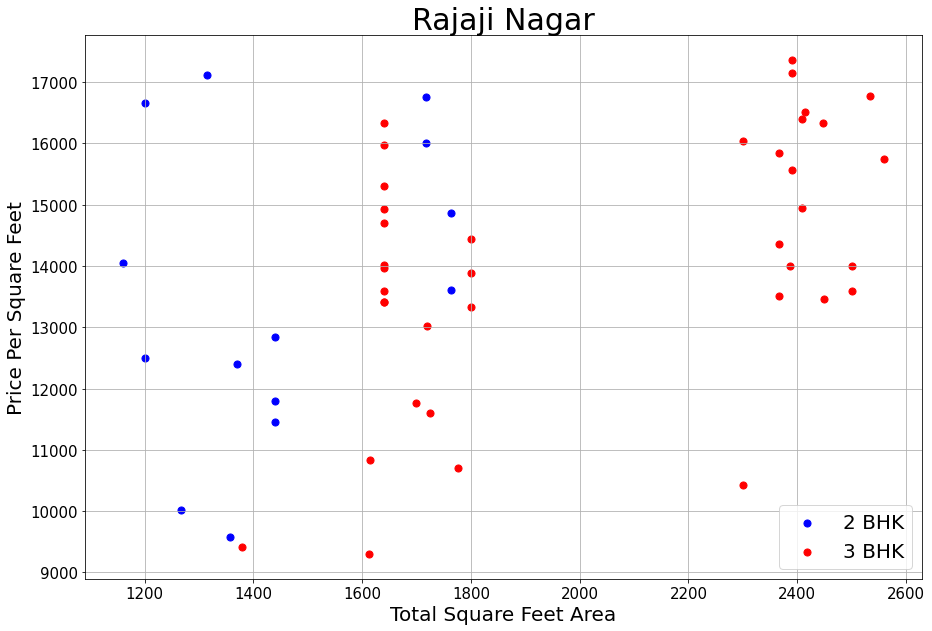

In [148]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color='b', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, color='r', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area', size=20)
    plt.ylabel('Price Per Square Feet', size=20)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.title(location, size=30)
    plt.grid()
    plt.legend(fontsize=20)
    
plot_scatter_chart(df7, 'Rajaji Nagar')